## This template is to output text similarity score based on GloVe, Bert embedding
ref: https://github.com/adsieg/text_similarity/blob/master/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration.ipynb

### 1.Cosine Similarity equation

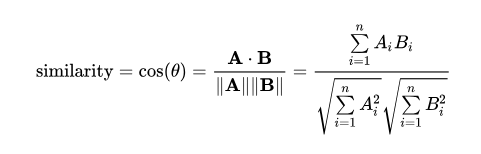

### 2.Pre-trained embedding models

- Pre-trained word embedding models : 
     ->  Word2Vec (by Google)
     ->  GloVe (by Stanford)
     ->  fastText (by Facebook)
     ->  Bert (by Google)

### 3.Import libraries

In [1]:
'''
# download all nltk data, only need to run once
import nltk
nltk.download('all')
'''

"\n# download all nltk data, only need to run once\nimport nltk\nnltk.download('all')\n"

In [2]:
import re
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import scipy

### 4.Load Pre-trained Glove Model

Please download pretrained Glove model from https://nlp.stanford.edu/projects/glove/, and saved to ./PreTrained folder
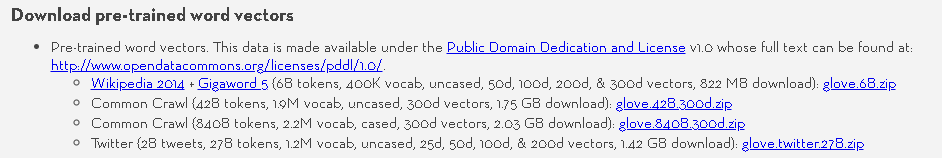

In [3]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

### 5.Preprocess data

In [4]:
def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

### 6.Functions to calculate cosine similarity score

In [5]:
def cosine_distance_between_two_words(word1, word2):
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def cosine_distance_wordembedding_method(s1, s2):
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

### 7.Generate similarity score for sample text

In [6]:
ss1 = 'The president greets the press in Chicago'
ss2 = 'Obama speaks to the media in Illinois'

In [7]:
gloveFile = "../data_glove/glove.6B.50d.txt"
model = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


In [8]:
cosine_distance_wordembedding_method(ss1, ss2)

Word Embedding method with a cosine distance asses that our two sentences are similar to 81.25 %
